In [0]:

import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
# Opening the data
url = 'https://raw.githubusercontent.com/LakshmiPanguluri/Linear_Multiple_Regression/master/50_Startups.csv'
starup = pd.read_csv(url)
starup.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [0]:
# Converting the dataset into a tensor
profit = np.array(starup['Profit']).reshape(-1,1)
rd = np.array(starup['R&D Spend']).reshape(-1,1)
marketing = np.array(starup['Marketing Spend']).reshape(-1,1)
administration = np.array(starup['Administration']).reshape(-1,1)

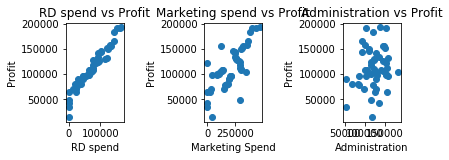

In [19]:
# Ploting profit with the independent variables
plt.subplot(2,5,1)
plt.scatter( rd,profit)
plt.title('RD spend vs Profit')
plt.xlabel('RD spend')
plt.ylabel('Profit')
plt.subplot(2,5,3)
plt.scatter( marketing_spend, profit)
plt.title('Marketing spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.subplot(2,5,5)
plt.scatter( administration, profit)
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show() 

As we can see the Graphic of RD spend vs Profit has a lineal tendence, so we are going to work with that variables

In [0]:
profit_torch = torch.from_numpy(profit).float()
rd_torch = torch.from_numpy(rd).float().requires_grad_(True)

tensor(nan, grad_fn=<MeanBackward0>)


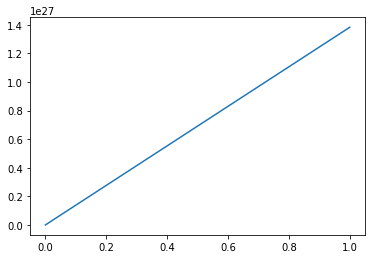

In [17]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.010)

losses = []
iterations = 1000
for i in range(iterations):
  pred = model(rd_torch)
  loss = loss_function(pred, profit_torch)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

In [12]:
x = torch.Tensor([[165349.20]])
p = model(x)
p

tensor([[nan]], grad_fn=<AddmmBackward>)